In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
with open('Psptospikedict.pickle', 'rb') as handle:
    pspsAndSpikes = pickle.load(handle)
pspsAndSpikes.keys()

['pspTime', 'pspTraces', 'spikeTimesByTrial']

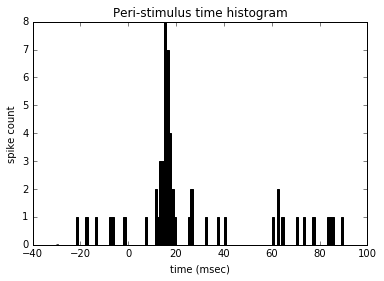

In [2]:
spikes=pspsAndSpikes['spikeTimesByTrial'] #0
spikesUnpacked = [a for b in spikes for a in b]
binrange = np.arange(-30,100,1) #1
psth,bins,patches=plt.hist(spikesUnpacked,bins=binrange,facecolor='k') #5
plt.xlabel('time (msec)');plt.ylabel('spike count') #8
plt.title('Peri-stimulus time histogram') #9

In [3]:
meanPsp = np.mean(pspsAndSpikes['pspTraces'],0) #1
downSampledPsp = [np.mean(meanPsp[ind_*10:ind_*10+10]) for ind_ in range(len(meanPsp)/10)] #2
dPSP = np.diff(downSampledPsp)#3
zeroIndex=np.where(binrange==0)[0][0]#4
fiftyIndex=np.where(binrange==50)[0][0]#5
evokedPSTH = psth[zeroIndex:fiftyIndex] #6
evokedPSP = downSampledPsp[zeroIndex:fiftyIndex]#6
evokedDPSP = dPSP[zeroIndex:fiftyIndex]#6
evokedRange = range(50) #7

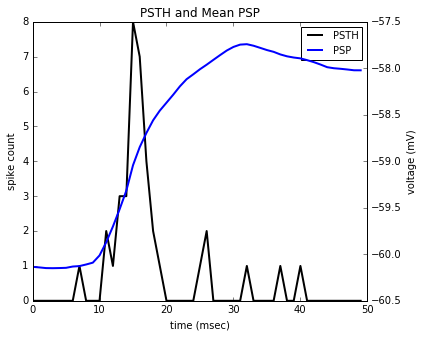

In [4]:
f, axarr = plt.subplots(1,1,figsize=(6,5)) #1
line1=axarr.plot(evokedRange,evokedPSTH,c='k',label='PSTH',lw=2)#2
plt.ylabel('spike count')#3
plt.xlabel('time (msec)')#4
ax2 = axarr.twinx()#5
line2 = ax2.plot(evokedRange,evokedPSP,c='b',label='PSP',lw=2)#6
lines = line1+line2#7
lineLabels = [l.get_label() for l in lines]#8
axarr.legend(lines, lineLabels, loc=0,fontsize=10)#9
plt.ylabel('voltage (mV)')#10
plt.title('PSTH and Mean PSP')#11
plt.savefig('Figure 7.2 - PSTH and mean PSP.png',dpi=500)#12

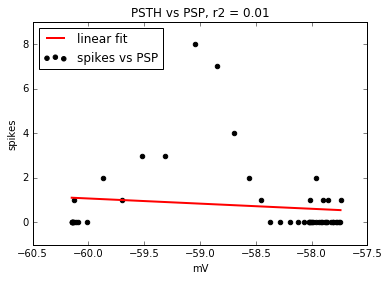

In [5]:
import scipy.stats as st #1
slope1,intercept1,rvalue1,pvalue1,stderr1=st.linregress(evokedPSP,evokedPSTH) #2
PSPrange = np.linspace(min(evokedPSP),max(evokedPSP),100)#3
plt.plot(PSPrange,slope1*PSPrange+intercept1,c='r',lw=2,label='linear fit') #4
plt.scatter(evokedPSP,evokedPSTH,c='k',label='spikes vs PSP')#5
plt.title('PSTH vs PSP, r2 = '+str(rvalue1**2)[:4])#6
plt.legend(loc='upper left') #7
plt.xlabel('mV');plt.ylabel('spikes') #8
plt.savefig('Figure 7.x. spikes vs psp fit.png',dpi=300)#9

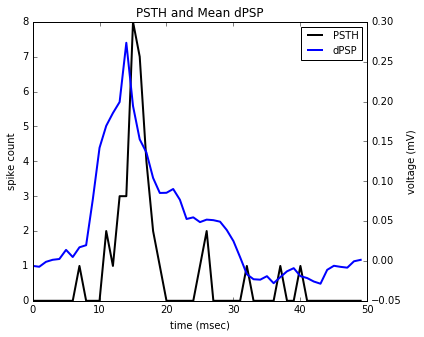

In [6]:
f, axarr = plt.subplots(1,1,figsize=(6,5)) #1
line1=axarr.plot(evokedRange,evokedPSTH,c='k',label='PSTH',lw=2)#2
plt.ylabel('spike count')#3
plt.xlabel('time (msec)')#4
ax2 = axarr.twinx()#5
line2 = ax2.plot(evokedRange,evokedDPSP,c='b',label='dPSP',lw=2)#6
lines = line1+line2#7
lineLabels = [l.get_label() for l in lines]#8
axarr.legend(lines, lineLabels, loc=0,fontsize=10)#9
plt.ylabel('voltage (mV)')#10
plt.title('PSTH and Mean dPSP')#11
plt.savefig('Figure 7.X - PSTH and mean dPSP.png',dpi=500)#12

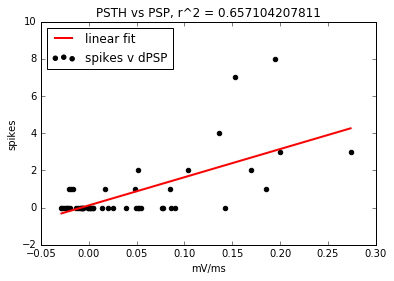

In [7]:
slope2,intercept2,rvalue2,pvalue2,stderr2= st.linregress(evokedDPSP,evokedPSTH) #2
dPSPrange = np.linspace(min(evokedDPSP),max(evokedDPSP),100) #3
plt.plot(dPSPrange, slope2*dPSPrange + intercept2,c='r', lw=2,label='linear fit') #4
plt.scatter(evokedDPSP,evokedPSTH,c='k',label='spikes v dPSP') #5
plt.title('PSTH vs PSP, r^2 = '+str(rvalue2)) #6
plt.xlabel('mV/ms');plt.ylabel('spikes') #8
plt.legend(loc='upper left') #7
plt.savefig('Figure 7.x. spikes vs dpsp fit.png',dpi=300) #9

In [8]:
import h5py #1
greData=[] #2
with h5py.File('logSataSet.mat') as f: #3
    for key in f.keys(): #4
        for vals in f[key]: #5
            greData.append(vals) #6
x_orig = greData[0] #7
y = greData[1] #8
x=x_orig-np.mean(x_orig) #9

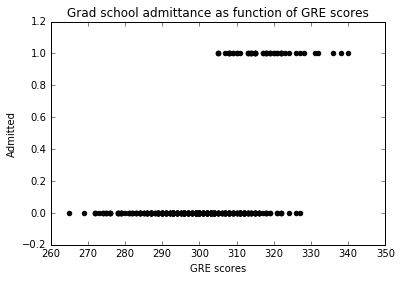

In [9]:
plt.scatter(x+np.mean(x_orig),y,c='k') #1
plt.title('Grad school admittance as function of GRE scores') #2
plt.xlabel('GRE scores') #3
plt.ylabel('Admitted') #4

In [10]:
from sklearn.linear_model import LogisticRegression #1
logRegression = LogisticRegression() #2
logRegression.fit(x.reshape(len(x),1),y.reshape(len(y),1)) #3
x_pred = np.arange(x.min(),x.max(),1) #4
y_pred=logRegression.predict_proba(x_pred.reshape(len(x_pred),1)) #5
y_proba=np.array([_[1] for _ in y_pred]) # note for_

/Users/erikleenylen/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


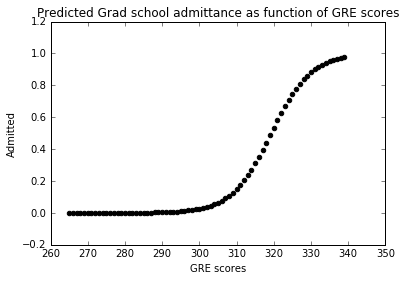

In [28]:
plt.scatter(x_pred+np.mean(x_orig),y_pred[:,1],c='k') #1
plt.title('Predicted Grad school admittance as function of GRE scores') #2
plt.xlabel('GRE scores') #3
plt.ylabel('Admitted') #4

In [31]:
import h5py # 6
dressData = [] # init
with h5py.File("dressData.mat") as f: #8
    for column in f['DATA']: #9
        rowData = [] #9
        for rowNumber in range(len(column)): #10
            try: #11
                rowData.append(''.join([chr(_) for _ in f[column[rowNumber]][:]])) #12
            except: #13
                rowData.append('') #14
        dressData.append(rowData) #15
dressData=np.array(dressData).T #16
numParticipants=len(dressData) #5

In [32]:
nonResponder = np.zeros(numParticipants) #1
killSet=[];
for nn in range(numParticipants): #3
    if dressData[nn][0]=='': #2
        killSet.append(nn) #4
dressData = [v for i, v in enumerate(dressData) if i not in killSet] #5
numParticipants = len(dressData) #6

In [33]:
numResponses = np.zeros(shape=(numParticipants,2)) #1
for nn in range(numParticipants): #4
    if dressData[nn][0]=='White/Gold': #2
        numResponses[nn][0] = 1 #2
    elif dressData[nn][0]=='Blue/Black': #2
        numResponses[nn][0] = 2 #2
    elif dressData[nn][0]=='Blue/Gold': #2
        numResponses[nn][0] = 3 #2
    elif dressData[nn][0]=='White/Black': #2
        numResponses[nn][0] = 4 #2
    else:
        numResponses[nn][0] = 5 #2
    if dressData[nn][3]=='Strong owl': #3
        numResponses[nn][1] = 1 #3
    elif dressData[nn][3]=='Owl':#3
        numResponses[nn][1] = 2 #3
    elif dressData[nn][3]=='Lark':#3
        numResponses[nn][1] = 3 #3
    elif dressData[nn][3]=='Strong lark': #3
        numResponses[nn][1] = 4 #3
    else: #3
        numResponses[nn][1] = 5 #3

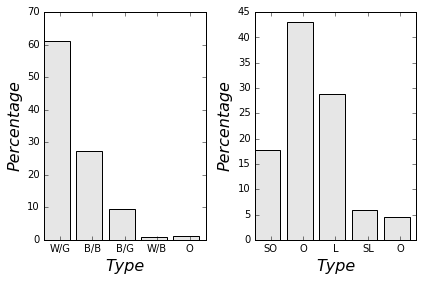

In [34]:
edges = range(int(numResponses.min()),int(numResponses.max())+1) #1
edgesplus = range(int(numResponses.min()),int(numResponses.max())+2) #1
marginals = []
marginals.append(np.histogram(numResponses[:,0],edgesplus)[0]) #2
marginals.append(np.histogram(numResponses[:,1],edgesplus)[0]) #2
TickLabels = [['W/G','B/B','B/G','W/B','O'],\
['SO','O','L','SL','O']]#3
f = plt.figure; #4
fsize=16; #8
for ii in range(2): #10
    ax = plt.subplot(1,2,ii+1); #5
    h = plt.bar(edges,marginals[ii]/float(numParticipants)*100,facecolor=[.9,.9,.9]); #6
    plt.ylabel('Percentage',fontsize=fsize,style='italic') #9
    plt.xlabel('Type',fontsize=fsize,style='italic') #9
    plt.xticks([edge+.5 for edge in edges],TickLabels[ii])
plt.tight_layout()

([<matplotlib.axis.XTick at 0x110703050>,
 <a list of 4 Text xticklabel objects>)

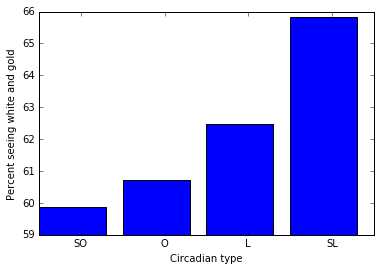

In [35]:
RESULT=np.zeros(4)
for ii in range(4): #4
    temp = np.where(numResponses[:,1]==ii+1) #1
    ColorSubSet = numResponses[temp,0] #2
    RESULT[ii] = len(np.where(ColorSubSet[0]==1)[0])/float(len(ColorSubSet[0]))*100
f = plt.figure() #5
plt.bar(range(4),RESULT) #6
plt.ylim([59, 66]) #7
plt.xlabel('Circadian type') #8
plt.ylabel('Percent seeing white and gold') #8
plt.xticks([edge-.5 for edge in edges[:-1]],TickLabels[1][:-1])